## About the dataset
The credit card data has 44 attributes for each customer for three continuous months (Apr, May & Jun), which include the credit card & debit card consumptions, no. of transactions, credit & debit amounts, no. of times amount get credited & debited and max credit amount. It also has information on monthly EMIs, investments, loans, along with basic details on the demography. A complete data dictionary info is given below:




|Feature|Description|
|-----|-----|
|account_type |	Account Type – current or saving | 
|age	| Age of customer |
|card_lim |	Maximum Credit Card Limit allocated |
|cc_cons |	(Target) Average Credit Card Spend in next three months |
|cc_cons_apr |	Credit card spend in April |
|cc_cons_jun |	Credit card spend in June | 
|cc_cons_may |	Credit card spend in May |
|cc_count_apr |	Number of credit card transactions in April | 
|cc_count_jun	| Number of credit card transactions in June |
|cc_count_may |	Number of credit card transactions in May | 
|credit_amount_apr |	Total amount credited for April |
|credit_amount_jun |	Total amount credited for June |
|credit_amount_may |	Total amount credited for May |
|credit_count_apr |	Total number of times amount credited in april |
|credit_count_jun |	Total number of times amount credited in June |
|credit_count_may |	Total number of times amount credited in May | 
|dc_cons_apr |	Debit card spend in April |
|dc_cons_jun |	Debit card spend in June |
|dc_cons_may |	Debit card spend in May |
|dc_count_apr |	Number of debit card transactions in April |
|dc_count_jun |	Number of debit card transactions in June |
|dc_count_may |	Number of debit card transactions in May |
|debit_amount_apr |	Total amount debited for April |
|debit_amount_jun |	Total amount debited for June |
|debit_amount_may |	Total amount debited for May |
|debit_count_apr |	Total number of times amount debited in april |
|debit_count_jun |	Total number of times amount debited in June |
|debit_count_may |	Total number of times amount debited in May |
|emi_active |	Monthly EMI paid to other bank for active loans |
|gender |	Gender of customer |
|id |	Unique ID for every Customer |
|investment_1 |	DEMAT investment in june |
|investment_2 |	fixed deposit investment in june |
|investment_3 |	Life Insurance investment in June |
|investment_4 |	General Insurance Investment in June |
|loan_enq |	Loan enquiry in last 3 months |
|max_credit_amount_apr |	Maximum amount credited in April |
|max_credit_amount_jun |	Maximum amount credited in June |
|max_credit_amount_may |	Maximum amount credited in May |
|personal_loan_active |	Active personal loan with other bank |
|personal_loan_closed |	Closed personal loan in last 12 months |
|region_code |	Code assigned to region of residence (has order) |
|vehicle_loan_active |	Active Vehicle loan with other bank |
|vehicle_loan_closed |	Closed vehicle loan in last 12 months |

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
import sys
from impyute.imputation.cs import fast_knn
from sklearn import model_selection
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import accuracy_score
from ipywidgets import Image
from io import StringIO
import pydotplus
import xgboost
warnings.filterwarnings("ignore")

### Load the 'Train' data

In [2]:
df = pd.read_csv('Train.csv')
df.head()

,ID,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,cc_cons
0,12554,saving,F,36,336.0,10740.542453,26271.575951,12332.393444,4.0,6.0,...,2.0,1.0,110403.214364,1.114847e+06,6.868706e+05,2.0,1.0,161824.467583,NaN,1946.0
1,17645,current,M,24,529.0,15400.274698,16346.513708,13308.843760,14.0,10.0,...,2.0,17.0,336653.547124,4.010666e+05,2.368395e+05,10.0,31.0,530033.850635,NaN,66784.0
2,7604,current,M,34,541.0,NaN,16616.791206,8165.060330,19.0,8.0,...,4.0,22.0,359000.879855,8.944534e+05,1.896231e+06,5.0,24.0,481495.648386,Y,14469.0
3,1590,current,M,39,523.0,15962.461007,17848.552395,28502.691521,NaN,1.0,...,6.0,39.0,217724.536892,1.772801e+06,1.276362e+06,7.0,37.0,536714.940949,NaN,6494.0
4,16556,current,M,28,239.0,NaN,35661.995527,13474.223363,23.0,14.0,...,4.0,15.0,519029.306872,8.525740e+05,6.110580e+05,3.0,26.0,349316.588945,NaN,14588.0


### Lets check the feature types and non-null count

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 40 columns):
ID                       15000 non-null int64
account_type             15000 non-null object
gender                   15000 non-null object
age                      15000 non-null int64
region_code              15000 non-null float64
dc_cons_apr              6387 non-null float64
dc_cons_may              7153 non-null float64
dc_cons_jun              5334 non-null float64
cc_count_apr             13915 non-null float64
cc_count_may             14470 non-null float64
cc_count_jun             14256 non-null float64
dc_count_apr             6387 non-null float64
dc_count_may             7153 non-null float64
dc_count_jun             7890 non-null float64
card_lim                 14991 non-null float64
personal_loan_active     1259 non-null float64
vehicle_loan_active      389 non-null float64
personal_loan_closed     1253 non-null float64
vehicle_loan_closed      711 non-null float

### Lets check the number of missing values in the given dataset

In [5]:
# Null count for features 
df.isnull().sum()

ID                           0
account_type                 0
gender                       0
age                          0
region_code                  0
dc_cons_apr               8613
dc_cons_may               7847
dc_cons_jun               9666
cc_count_apr              1085
cc_count_may               530
cc_count_jun               744
dc_count_apr              8613
dc_count_may              7847
dc_count_jun              7110
card_lim                     9
personal_loan_active     13741
vehicle_loan_active      14611
personal_loan_closed     13747
vehicle_loan_closed      14289
investment_1             14357
investment_2             13904
investment_3             14381
investment_4             14815
debit_amount_apr           644
credit_amount_apr         1485
debit_count_apr            751
credit_count_apr           776
max_credit_amount_apr     1483
debit_amount_may           996
credit_amount_may         1478
credit_count_may           885
debit_count_may            885
max_cred

### We see almost 90% of the features have null values. 
#### So dropping fetures ('personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3', 'investment_4' & 'loan_enq') having more than 90% null data, to reduce the curse of dimensionality. Also dropping useless 'ID' column.

In [6]:
droping=['ID','personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed','investment_1', 'investment_2', 'investment_3', 'investment_4', 'loan_enq']
df=df.drop(droping, axis=1)
df.columns

Index(['account_type', 'gender', 'age', 'region_code', 'dc_cons_apr',
       'dc_cons_may', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'cc_cons'],
      dtype='object')

### Now dealing with missing values

In [7]:
# Impute missing values with mode for card_lim
df['card_lim'].fillna(df['card_lim'].mode()[0], inplace = True)

# Lets Confirm the data imputing
df[df['card_lim'].isnull()].iloc[:,10:16]

,dc_count_apr,dc_count_may,dc_count_jun,card_lim,debit_amount_apr,credit_amount_apr


In [8]:
# Impute missing values with mode for card_lim
df['card_lim'].fillna(df['card_lim'].mode()[0], inplace = True)
# Impute missing values with zero for others
df.fillna(df.median(), inplace = True)
df.isnull().sum()

account_type             0
gender                   0
age                      0
region_code              0
dc_cons_apr              0
dc_cons_may              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
cc_cons                  0
dtype: int64

#### Lets also check the descriptive Statistics of the data

In [9]:
df.describe()

,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,cc_cons
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,15000.000000
mean,35.821400,556.877333,10223.282226,23162.800038,8353.371095,8.914333,9.404933,19.127667,3.973000,5.147200,...,5.689506e+05,4.052067,13.849667,3.239593e+05,1.003327e+06,9.861743e+05,5.824200,16.037467,3.259697e+05,12268.175133
std,8.375531,192.645289,7239.483738,11414.636735,5950.594524,8.158045,8.913218,12.004168,4.199633,5.333601,...,3.614986e+05,3.900731,11.210946,2.114186e+05,5.988481e+05,5.945748e+05,4.753132,13.361645,1.970486e+05,11847.712240
min,22.000000,129.000000,15.615941,21.929843,31.457671,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.306745e+01,0.000000,0.000000,2.650332e+01,6.810641e+01,3.941829e+01,0.000000,0.000000,2.550365e+01,0.000000
25%,30.000000,450.750000,9704.319537,22829.797859,7930.919138,3.000000,3.000000,10.000000,3.000000,4.000000,...,3.160255e+05,2.000000,6.000000,1.774582e+05,5.340152e+05,5.144030e+05,3.000000,6.000000,1.684194e+05,5435.000000
50%,34.000000,566.000000,9704.319537,22829.797859,7930.919138,7.000000,7.000000,18.000000,3.000000,4.000000,...,5.652102e+05,3.000000,11.000000,3.219137e+05,1.004250e+06,9.741022e+05,5.000000,13.000000,3.233262e+05,10810.000000
75%,39.000000,710.000000,9704.319537,22829.797859,7930.919138,12.000000,12.000000,26.000000,3.000000,4.000000,...,8.179681e+05,5.000000,18.000000,4.644255e+05,1.460194e+06,1.451856e+06,7.000000,22.000000,4.796856e+05,16394.000000
max,223.000000,977.000000,361712.821531,343536.313152,292828.344121,100.000000,130.000000,137.000000,62.000000,71.000000,...,2.137043e+07,71.000000,171.000000,1.276041e+07,2.737828e+07,2.589564e+07,94.000000,162.000000,3.147874e+06,237021.000000


####  Max age looks to be incorrect, so dropping junk data from 'age'.

In [10]:
df=df[df['age']<80]
df.shape

(14992, 30)

## 1.  Insight
- How many men and women are represented in this dataset? 

- What is the average age (age feature) of women? 

In [11]:
print(df['gender'].value_counts())
print(df.loc[df['gender'] == 'M', 'age'].mean())
print(df.loc[df['gender'] == 'F', 'age'].mean())

M    12789
F     2203
Name: gender, dtype: int64
36.04965204472594
33.95778483885611


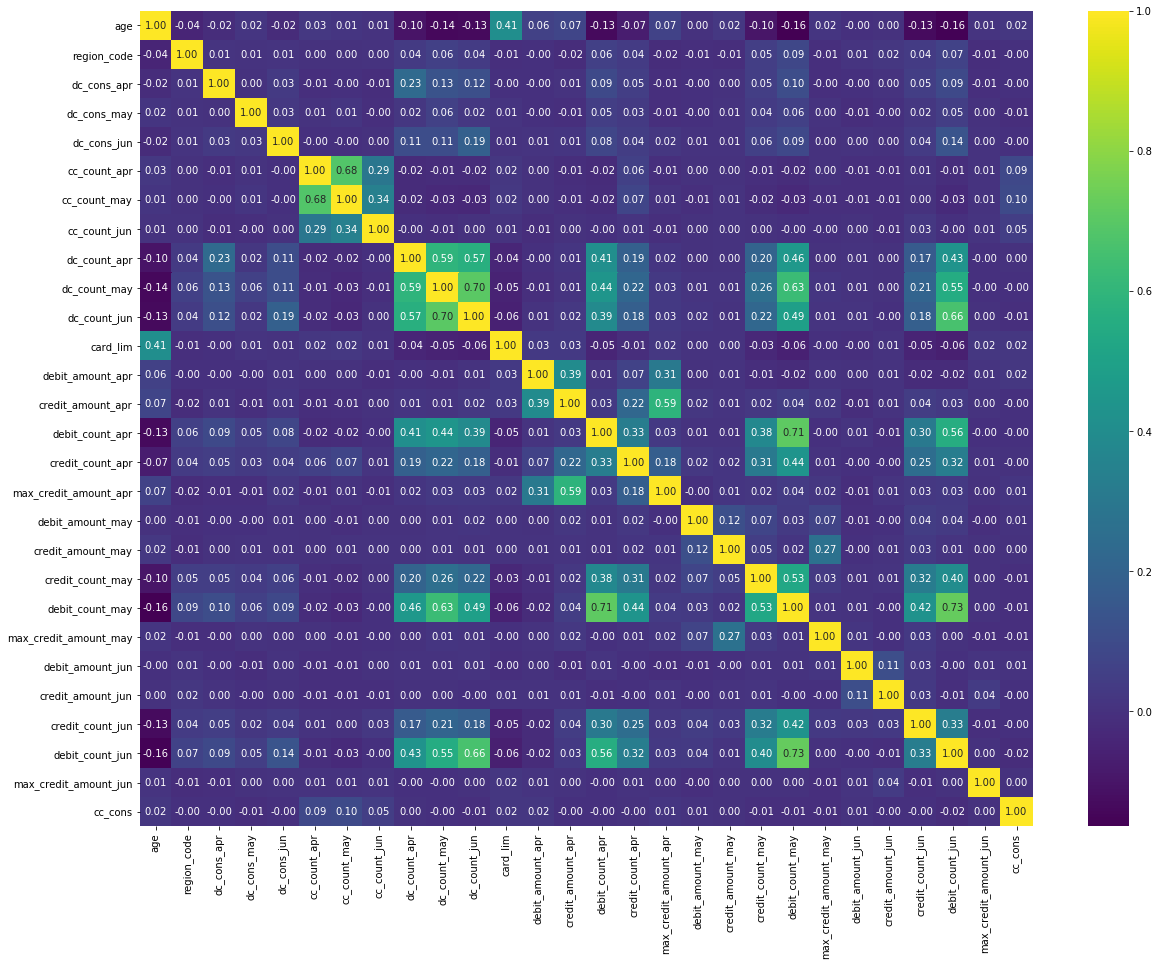

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), cmap='viridis',annot=True, fmt='.2f')

#### There are three set of co-rrelated features:                                                                                                        1)  dc_count_jun, dc_count_may & dc_count_apr                                                                                                   2)  debit_count_apr, debit_count_may & debit_count_jun                                                                                      3) cc_count_may & cc_count_apr

Also some relation we cannot avoid are 1)age vs card_lim  2) max_credit_amount_apr vs credit_amount_apr 3) debit count vs credit count


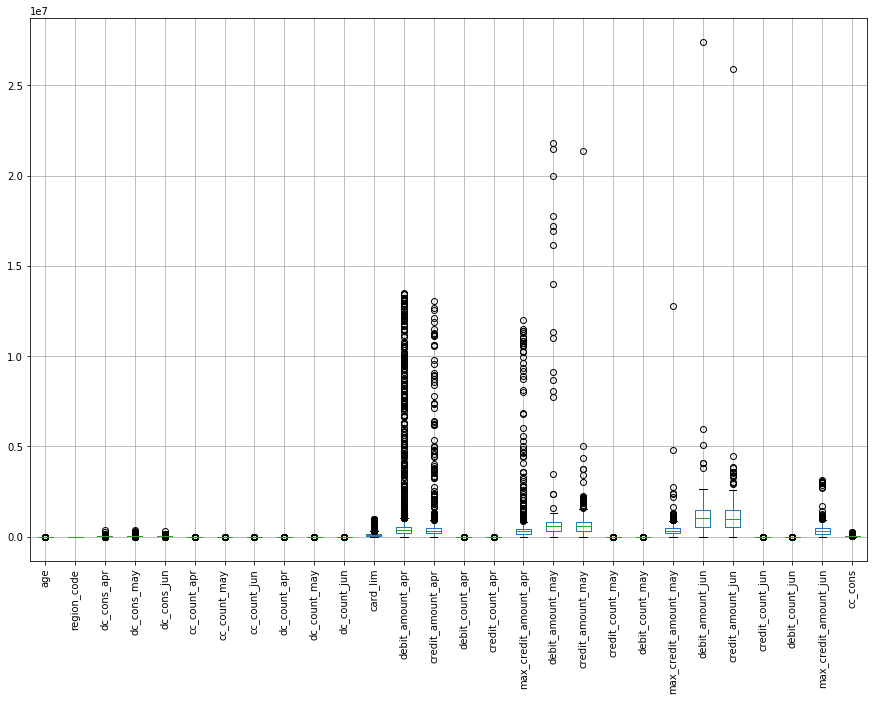

In [13]:
# Uni-variate Analysis
df.boxplot(rot=90, figsize=(15,10))

#### It seems like data have many outliers. The features like dc_cons_apr, dc_cons_may, dc_cons_jun, card_lim, debit_amount_apr,  credit_amount_apr, max_credit_amount_apr, debit_amount_may, credit_amount_may, max_credit_amount_may, debit_amount_jun, credit_amount_jun and max_credit_amount_jun have outliers. 

Need to treat using log/ squart transformation before standardizing. This is done when the variables span several orders of magnitude.

Mostly because of skewed distribution. Logarithm naturally reduces the dynamic range of a variable so the differences are preserved while the scale is not that dramatically skewed.

#### Many features have outliers. Hence we are droping the quantile greater than 0.99.

In [14]:
# Function to detect outliers in every feature
def detect_outliers(dataframe):
    cols = list(dataframe)
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25)
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)

            print(column + ' ---------', dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0])

detect_outliers(df)

age --------- 586
region_code --------- 0
dc_cons_apr --------- 6386
dc_cons_may --------- 7149
dc_cons_jun --------- 5333
cc_count_apr --------- 693
cc_count_may --------- 845
cc_count_jun --------- 368
dc_count_apr --------- 5731
dc_count_may --------- 6610
dc_count_jun --------- 5684
card_lim --------- 1315
debit_amount_apr --------- 256
credit_amount_apr --------- 120
debit_count_apr --------- 579
credit_count_apr --------- 801
max_credit_amount_apr --------- 89
debit_amount_may --------- 18
credit_amount_may --------- 25
credit_count_may --------- 1043
debit_count_may --------- 684
max_credit_amount_may --------- 27
debit_amount_jun --------- 6
credit_amount_jun --------- 14
credit_count_jun --------- 839
debit_count_jun --------- 478
max_credit_amount_jun --------- 30
cc_cons --------- 524


### Plot the distribution of target variable

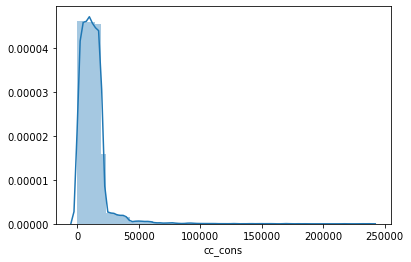

In [15]:
#histogram
sns.distplot(df['cc_cons'])

#### Target variable is right skewed

### Check the skewness of numerical columns by plotting histograms.

In [16]:
cat = ['account_type', 'gender', 'region_code']

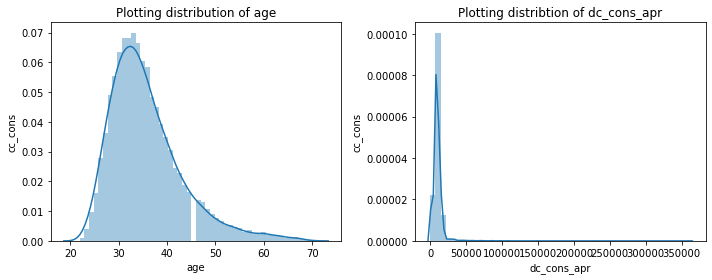

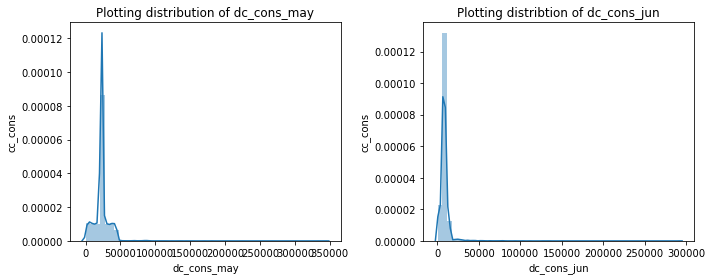

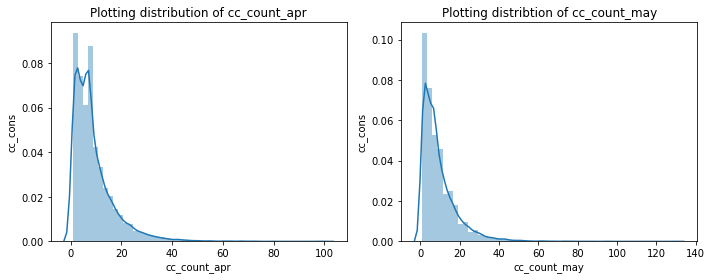

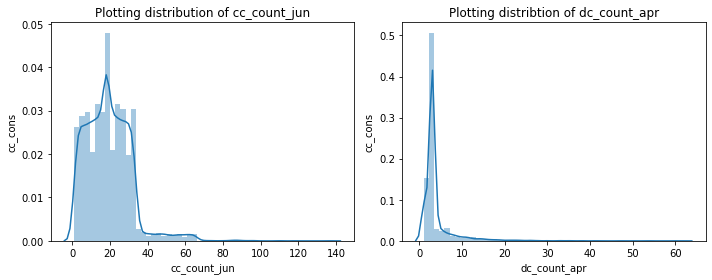

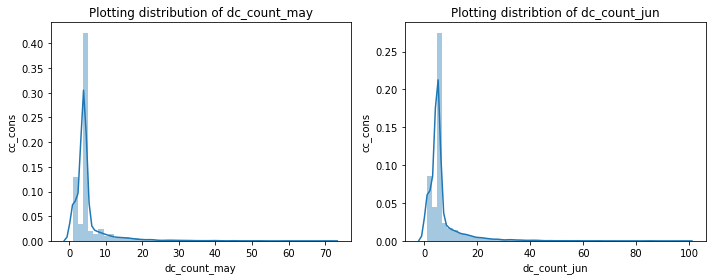

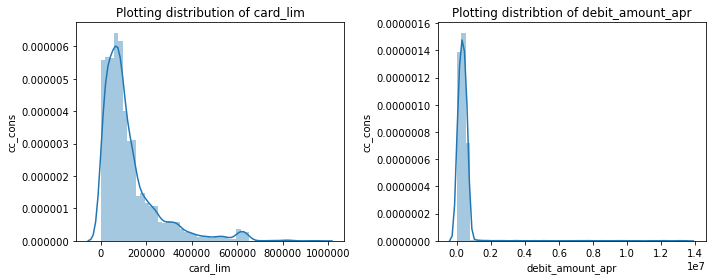

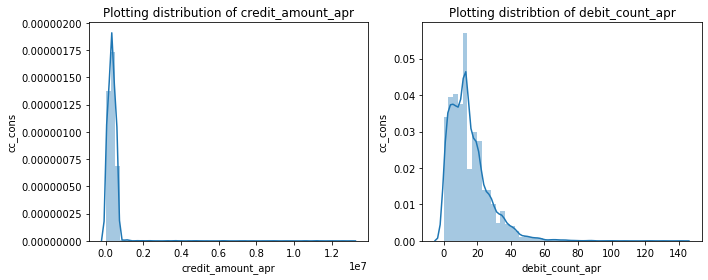

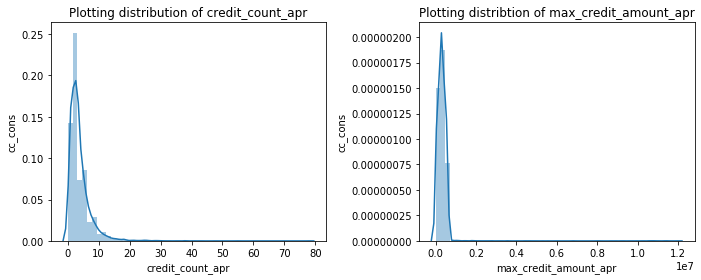

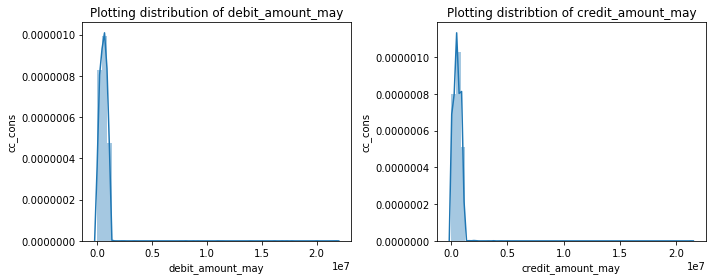

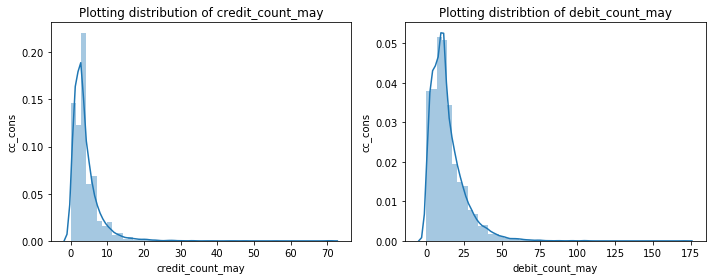

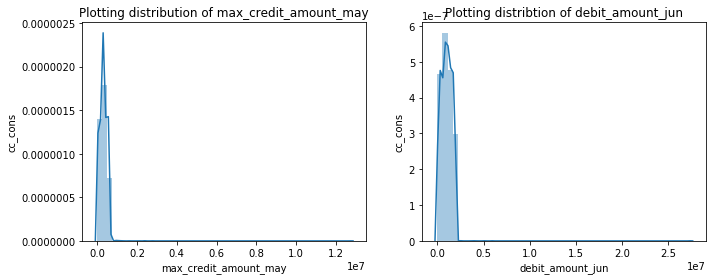

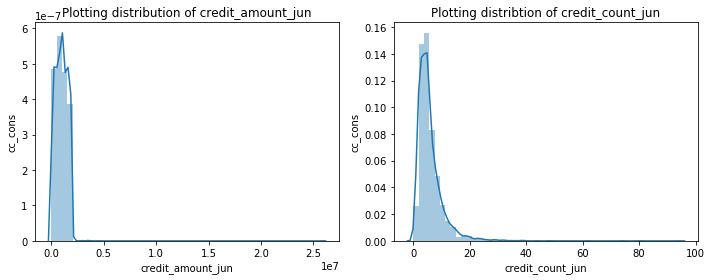

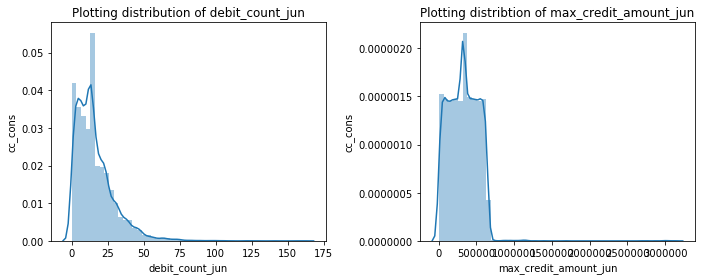

In [17]:
df_num= df.drop(cat, axis =1)
df_num.drop('cc_cons', axis=1, inplace = True)
numerical = df_num.columns

for i in range(0,len(numerical),2):
    if len(numerical) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(df[numerical[i]])
        plt.title('Plotting distribution of '+numerical[i])
        plt.xlabel(numerical[i])
        plt.ylabel("cc_cons")
        plt.subplot(122)
        sns.distplot(df[numerical[i+1]])
        plt.title('Plotting distribtion of '+numerical[i+1])
        plt.xlabel(numerical[i+1])
        plt.ylabel("cc_cons")
        plt.tight_layout()
        plt.show()

In [18]:
le = LabelEncoder()
for col in cat:
    df[col] = le.fit_transform(df[col])
    
df[cat].head()

,account_type,gender,region_code
0,1,0,135
1,0,1,324
2,0,1,336
3,0,1,318
4,0,1,38


### Split dataset features into predictor and target

In [21]:
X= df.iloc[:,:-1]
y= df.iloc[:,-1]
y.head()

0     1946.0
1    66784.0
2    14469.0
3     6494.0
4    14588.0
Name: cc_cons, dtype: float64

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=60)

In [23]:
X_train.head()

,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun
168,1,1,36,411,9704.319537,22829.797859,31312.895548,13.0,9.0,20.0,...,388841.360209,768986.312795,4.0,13.0,519283.335140,1.183152e+06,1.226360e+06,5.0,1.0,484386.987330
12165,1,1,38,367,9704.319537,22829.797859,7930.919138,7.0,3.0,25.0,...,564905.997150,565210.236134,3.0,11.0,321913.714298,1.004250e+06,9.741022e+05,5.0,13.0,323326.242950
11116,0,1,37,557,9704.319537,22829.797859,7930.919138,33.0,37.0,60.0,...,733708.331859,777638.308873,3.0,9.0,431812.710108,4.314961e+05,1.672717e+06,14.0,13.0,208056.685023
778,0,1,70,476,9704.319537,39964.001576,13722.777032,47.0,13.0,14.0,...,902507.241139,725417.085876,1.0,3.0,136806.812923,2.629069e+05,1.066163e+06,4.0,17.0,421396.092936
11710,0,0,29,307,9704.319537,35907.318242,7930.919138,13.0,6.0,24.0,...,957813.805164,215456.065010,1.0,2.0,251295.903556,2.774818e+05,9.335184e+05,2.0,5.0,284284.733021


### Create a baseline regression model 

In [24]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train,y_train)
y_pred = Lin_reg.predict(X_test)

### Plot the Residuals
#### Residuals are defined as the distance between actual and predicted target values. With the help of the histogram, visualize the residuals obtained. 

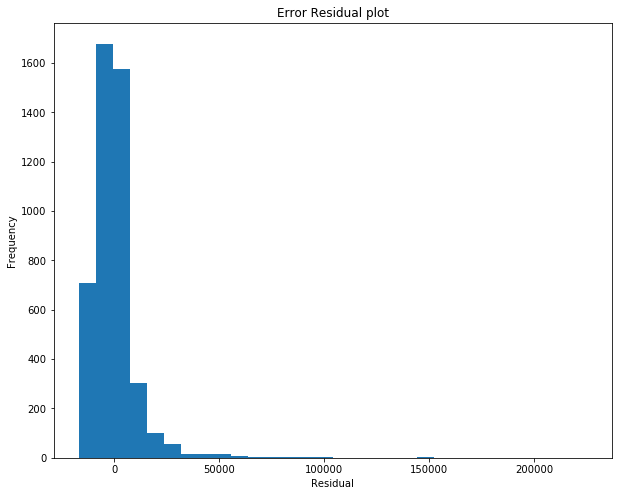

In [25]:
residual = (y_test - y_pred)
plt.figure(figsize=(10,8))
plt.hist(residual, bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency") 
plt.title("Error Residual plot")
plt.show()

### Evaluate the above model using error metrics.
Linear Regression error metrics are `RMSE` , `RMSLE`, `R2_SCORE` , `MAE`, `MSE`. 

In [26]:
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))
print("R2 Score: ",r2_score(y_test, y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSLE: ",np.sqrt(mean_squared_log_error( y_test, y_pred)))

Mean Squared Error:  160284204.6937312
R2 Score:  0.006589362839389268
Mean Absolute Error:  7102.196546838671
RMSE:  12660.339833264003
RMSLE:  1.1404157611685943


#### Linear Regression is not fitting for the given dataset

### Decision Tree (as it handles outliers better). We will then predict our test data and compute the accuracy.

* Train a decision tree (DecisionTreeClassifier) with a maximum depth of 3, and evaluate the accuracy metric on the test data. Use parameter random_state = 17 for results reproducibility.

In [27]:
tree = DecisionTreeRegressor(criterion='mse', max_depth=2, random_state=17)
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=17, splitter='best')

In [28]:
tree_predictions = tree.predict(X_test) 

In [29]:
print("Mean Squared Error: ",mean_squared_error(y_test, tree_predictions))
print("R2 Score: ",r2_score(y_test, tree_predictions))
print("Mean Absolute Error: ",mean_absolute_error(y_test, tree_predictions))
print("RMSE: ",np.sqrt(mean_squared_error(y_test, tree_predictions)))
print("RMSLE: ",np.sqrt(mean_squared_log_error(y_test, tree_predictions)))

Mean Squared Error:  159467123.42917952
R2 Score:  0.011653475183966422
Mean Absolute Error:  7066.91549187126
RMSE:  12628.029277333004
RMSLE:  1.137771959016084


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report,roc_curve,confusion_matrix

In [32]:
# Initialize RandomForrest model to variable rfc
rfc = RandomForestRegressor(criterion='mse', max_depth= 2,
max_features= 'auto',
n_estimators= 11)

# Fit the model
rfc.fit(X_train,y_train)

# Store the predicted values of test data
y_pred_rf = rfc.predict(X_test)

In [33]:
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred_rf))
print("R2 Score: ",r2_score(y_test, y_pred_rf))
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred_rf))
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("RMSLE: ",np.sqrt(mean_squared_log_error(y_test, y_pred_rf)))

Mean Squared Error:  159471810.16511518
R2 Score:  0.011624427697091821
Mean Absolute Error:  7075.376107110231
RMSE:  12628.214844748056
RMSLE:  1.139352089594022


In [34]:
test_dataset = pd.read_csv('Test.csv')
print(test_dataset.shape)
test_dataset.head()

(5000, 39)


,ID,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq
0,17591,saving,F,30,528.0,NaN,42771.755048,NaN,7.0,13.0,...,1.091052e+06,1.0,7.0,341772.344851,6.636797e+05,7.566017e+03,4.0,13.0,398008.239676,NaN
1,13541,saving,M,39,762.0,22502.476453,10236.114508,405.292748,4.0,2.0,...,3.271761e+05,6.0,13.0,173291.914429,1.722120e+06,1.855703e+06,2.0,18.0,299411.136857,NaN
2,13431,current,M,40,670.0,5641.673462,21121.266438,10685.178733,12.0,9.0,...,4.125111e+05,4.0,21.0,566091.118578,2.911543e+05,2.689932e+05,10.0,18.0,122919.566871,NaN
3,8687,current,F,24,548.0,NaN,6744.070501,NaN,9.0,2.0,...,2.730897e+05,7.0,19.0,397413.923723,6.850615e+05,9.234176e+05,9.0,12.0,549513.485678,NaN
4,14727,current,M,33,515.0,17672.792182,77621.691080,7066.852574,1.0,1.0,...,7.932167e+05,9.0,38.0,179406.943083,5.525640e+05,6.732497e+05,15.0,34.0,198565.622807,NaN


In [35]:
# le = LabelEncoder()
for col in cat:
    test_dataset[col] = le.fit_transform(test_dataset[col])

In [36]:
droping = ['personal_loan_active',
 'vehicle_loan_active',
 'personal_loan_closed',
 'vehicle_loan_closed',
 'investment_1',
 'investment_2',
 'investment_3',
 'investment_4',
 'loan_enq']

In [37]:
test_data = test_dataset.drop(droping, axis=1)
test_data.set_index('ID', inplace=True)

In [42]:
# Impute missing values with mode for card_lim
test_data['card_lim'].fillna(test_data['card_lim'].mode()[0], inplace = True)
# Impute missing values with zero for others
test_data.fillna(df.median(), inplace = True)
test_data.isnull().sum()

account_type             0
gender                   0
age                      0
region_code              0
dc_cons_apr              0
dc_cons_may              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
dtype: int64

In [43]:
coln2 = ['age', 'dc_cons_apr', 'dc_cons_may', 'dc_cons_jun', 'cc_count_apr',
       'cc_count_jun', 'card_lim', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun']

# Note: Adding 1 for each value to avoid inf values
test_data= np.log(1+test_data[coln2])
test_data.head()

,age,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_jun,card_lim,debit_amount_apr,credit_amount_apr,debit_count_apr,...,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun
ID,,,,,,,,,,,,,,,,,,,,,
17591,3.433987,9.180429,10.663657,8.978650,2.079442,3.258097,10.726654,13.047081,12.271725,2.995732,...,12.935687,13.192251,13.902654,0.693147,12.741903,13.405556,8.931554,1.609438,2.639057,12.894230
13541,3.688879,10.021425,9.233775,6.007074,1.609438,3.465736,12.160751,13.013939,13.018228,3.178054,...,13.287129,11.906461,12.698257,1.945910,12.062739,14.359067,14.433775,1.098612,2.944439,12.609576
13431,3.713572,8.638113,9.958083,9.276706,2.564949,1.386294,11.315876,12.112387,12.446450,3.178054,...,11.427872,13.079545,12.930021,1.609438,13.246512,12.581612,12.502445,2.397895,2.944439,11.719294
8687,3.218876,9.180429,8.816567,8.978650,2.302585,1.098612,11.223468,13.216030,12.862597,2.772589,...,12.366528,13.037832,12.517559,2.079442,12.892736,13.437265,13.735838,2.302585,2.564949,13.216790
14727,3.526361,9.779838,11.259615,8.863312,0.693147,3.295837,11.205707,12.147765,11.893858,3.135494,...,12.823149,12.481519,13.583853,2.302585,12.097418,13.222326,13.419873,2.772589,3.555348,12.198880


In [44]:
test_data['cc_cons'] = rfc.predict(test_data)

In [45]:
test_data.columns

Index(['age', 'dc_cons_apr', 'dc_cons_may', 'dc_cons_jun', 'cc_count_apr',
       'cc_count_jun', 'card_lim', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'cc_cons'],
      dtype='object')

In [46]:
test_da=test_data.reset_index()
test_da.head()

,ID,age,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_jun,card_lim,debit_amount_apr,credit_amount_apr,...,debit_amount_may,credit_amount_may,credit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,cc_cons
0,17591,3.433987,9.180429,10.663657,8.978650,2.079442,3.258097,10.726654,13.047081,12.271725,...,13.192251,13.902654,0.693147,12.741903,13.405556,8.931554,1.609438,2.639057,12.894230,11882.413248
1,13541,3.688879,10.021425,9.233775,6.007074,1.609438,3.465736,12.160751,13.013939,13.018228,...,11.906461,12.698257,1.945910,12.062739,14.359067,14.433775,1.098612,2.944439,12.609576,11882.413248
2,13431,3.713572,8.638113,9.958083,9.276706,2.564949,1.386294,11.315876,12.112387,12.446450,...,13.079545,12.930021,1.609438,13.246512,12.581612,12.502445,2.397895,2.944439,11.719294,12221.775624
3,8687,3.218876,9.180429,8.816567,8.978650,2.302585,1.098612,11.223468,13.216030,12.862597,...,13.037832,12.517559,2.079442,12.892736,13.437265,13.735838,2.302585,2.564949,13.216790,11882.413248
4,14727,3.526361,9.779838,11.259615,8.863312,0.693147,3.295837,11.205707,12.147765,11.893858,...,12.481519,13.583853,2.302585,12.097418,13.222326,13.419873,2.772589,3.555348,12.198880,11882.413248


In [47]:
filename = 'submission.csv'
pd.DataFrame({'Id': test_da.ID, 'cc_cons': test_da.cc_cons}).to_csv(filename, index=False)

### 2. Does people spend more with debit card vs credit card?

### 3. No of transaction comparision in debit & credit card

### 4. What percentage of average amount is spent every month

### 5. Which agegroup & gender spend more

### 6. Which account type people spend more with credit card and total expenditure

### 7. Is Card_lim value increase with age